In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
df = pd.read_csv('/content/Telco_customer_churn.csv')

In [6]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [7]:
df.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [8]:
df['Churn Reason']

,Churn Reason
0,Competitor made better offer
1,Moved
2,Moved
3,Moved
4,Competitor had better devices
...,...
7038,NaN
7039,NaN
7040,NaN
7041,NaN


In [9]:
df['Total Charges']

,Total Charges
0,108.15
1,151.65
2,820.5
3,3046.05
4,5036.3
...,...
7038,1419.4
7039,1990.5
7040,7362.9
7041,346.45


insight:
- kolom Churn Reason memiliki missing values 5.174
- kolom Total charges memiliki missing value 11

In [10]:
# Hapus baris yang Churn Reason nya missing
df_cleaned = df.dropna(subset=["Churn Reason"])

print("Jumlah baris awal:", len(df))
print("Jumlah baris setelah hapus missing Churn Reason:", len(df_cleaned))

# Cek distribusi churn reason setelah pembersihan
print("\nTop 5 Churn Reason:")
print(df_cleaned["Churn Reason"].value_counts().head())

Jumlah baris awal: 7043
Jumlah baris setelah hapus missing Churn Reason: 1869

Top 5 Churn Reason:
Churn Reason
Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Name: count, dtype: int64


In [11]:
# Ganti spasi kosong dengan NaN
df["Total Charges"] = df["Total Charges"].replace(" ", np.nan)

# Cek ulang missing value
print("Jumlah missing value sebelum konversi:", df["Total Charges"].isna().sum())

# Konversi ke numeric
df["Total Charges"] = pd.to_numeric(df["Total Charges"])

# Tangani missing value
# Karena semua missing value terjadi pada tenure = 0, kita bisa isi dengan 0
df["Total Charges"] = df["Total Charges"].fillna(0)

# Cek ulang setelah pembersihan
print("Jumlah missing value setelah pembersihan:", df["Total Charges"].isna().sum())
print(df[["Tenure Months", "Monthly Charges", "Total Charges"]].head(10))

Jumlah missing value sebelum konversi: 11
Jumlah missing value setelah pembersihan: 0
   Tenure Months  Monthly Charges  Total Charges
0              2            53.85         108.15
1              2            70.70         151.65
2              8            99.65         820.50
3             28           104.80        3046.05
4             49           103.70        5036.30
5             10            55.20         528.35
6              1            39.65          39.65
7              1            20.15          20.15
8             47            99.35        4749.15
9              1            30.20          30.20


In [12]:
df["Total Charges"] = pd.to_numeric(df["Total Charges"], errors="coerce")

In [13]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,2279.734304,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,2266.794470,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,398.550000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,1394.550000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,3786.600000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,8684.800000,1.000000,100.000000,6500.000000


insight:
- Tenure Months (masa berlangganan): 0 - 72 bulan, median 29 bulan.
- Monthly Charges: min $18, max $118, median sekitar $70

- CLTV (Customer Lifetime Value): rata-rata $4.400, max $6.500.
- Total Charges sepertinya memiliki outlier

## 2. Visualisasi distribusi data

- Bagaimana distribusi variabel Tenure months, Monthly Charges, Total Charges?
- Apakah ada outlier pada Monthly Charges atau Total Charges?


Fitur yang akan divisualisasikan: ['Tenure Months', 'Monthly Charges', 'Total Charges']


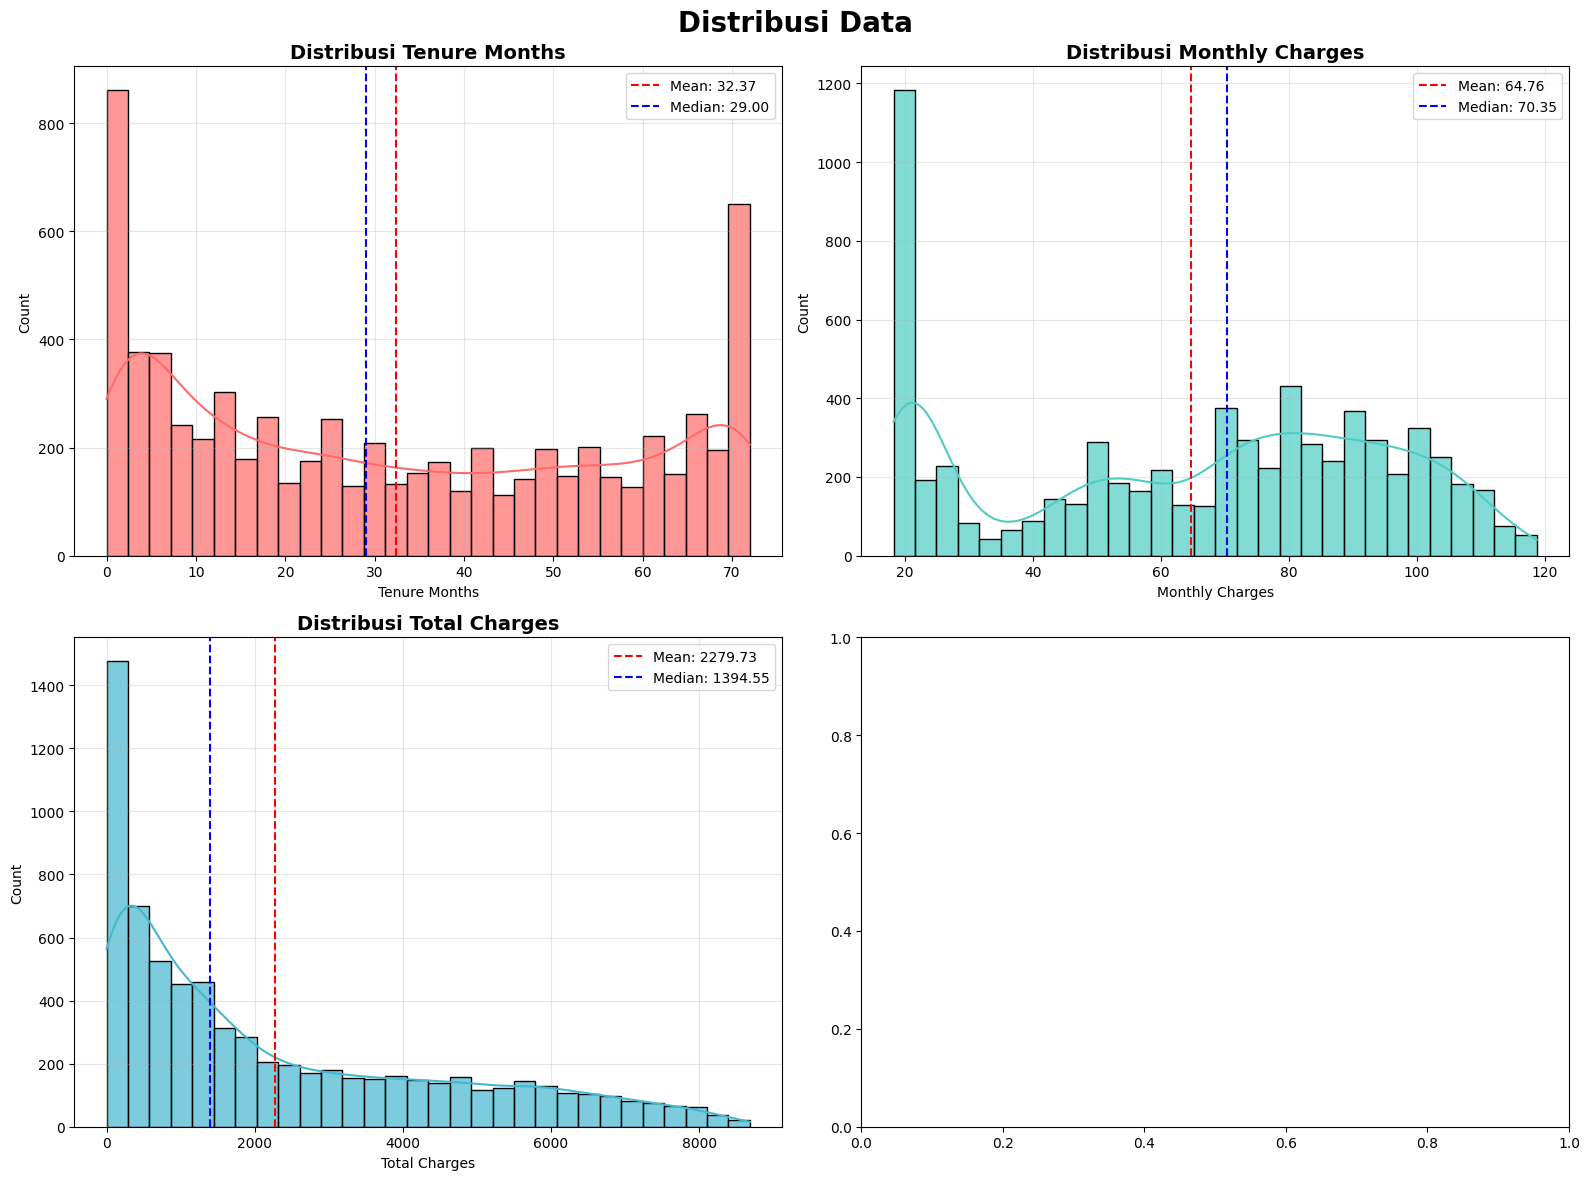

In [14]:
# Memeriksa apakah dataframe tidak kosong atau None
if df is not None:
    # Pilih 3 fitur numerik yang menarik
    # Mendefinisikan daftar data yang akan divisualisasikan
    numerical_cols = ["Tenure Months", "Monthly Charges", "Total Charges"]

    # Pastikan semua fitur ada di dataset
    # Memfilter fitur yang benar-benar ada dalam kolom dataframe
    available_numerical_cols = [f for f in numerical_cols if f in df.columns]
    # Mencetak daftar fitur yang tersedia untuk divisualisasikan
    print(f"Fitur yang akan divisualisasikan: {available_numerical_cols}")

    # Memeriksa apakah jumlah fitur yang tersedia minimal 3
    if len(available_numerical_cols) >= 3:
        # Buat subplot dengan layout 2x2
        # Membuat figure dengan 4 subplot (2 baris, 2 kolom) berukuran 16x12 inci
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        # Menambahkan judul utama untuk seluruh figure dengan emoji, font besar, tebal, dan posisi atas
        fig.suptitle('Distribusi Data', fontsize=20, weight='bold', y=0.98)

        # Mendefinisikan daftar warna untuk setiap histogram
        colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

        # Melakukan iterasi untuk setiap fitur yang tersedia (maksimal 4)
        for i, numerical_cols in enumerate(available_numerical_cols[:3]):
            # Menghitung posisi baris dan kolom untuk subplot berdasarkan indeks
            row, col = i // 2, i % 2

            # Histogram dengan KDE
            # Membuat histogram dengan kurva density (KDE) pada subplot yang sesuai
            sns.histplot(df[numerical_cols], kde=True, ax=axes[row, col],
                        color=colors[i], alpha=0.7, bins=30)

            # Tambahkan statistik deskriptif
            # Menghitung nilai rata-rata (mean) dari fitur
            mean_val = df[numerical_cols].mean()
            # Menghitung nilai tengah (median) dari fitur
            median_val = df[numerical_cols].median()

            # Menambahkan garis vertikal putus-putus merah untuk menunjukkan nilai rata-rata
            axes[row, col].axvline(mean_val, color='red', linestyle='--',
                                  label=f'Mean: {mean_val:.2f}')
            # Menambahkan garis vertikal putus-putus biru untuk menunjukkan nilai median
            axes[row, col].axvline(median_val, color='blue', linestyle='--',
                                  label=f'Median: {median_val:.2f}')

            # Mengatur judul subplot dengan mengganti underscore dengan spasi dan kapitalisasi
            axes[row, col].set_title(f'Distribusi {numerical_cols.replace("_", " ").title()}',
                                    fontsize=14, weight='bold')
            # Mengatur label sumbu X dengan format yang rapi
            axes[row, col].set_xlabel(numerical_cols.replace("_", " ").title())
            # Mengatur label sumbu Y
            axes[row, col].set_ylabel('Count')
            # Menampilkan legenda untuk garis mean dan median
            axes[row, col].legend()
            # Menambahkan grid dengan transparansi 30% untuk kemudahan membaca
            axes[row, col].grid(alpha=0.3)

        # Menyesuaikan tata letak agar tidak ada elemen yang tumpang tindih
        plt.tight_layout()
        # Menampilkan seluruh visualisasi
        plt.show()
    else:
        # Mencetak pesan peringatan jika fitur yang tersedia kurang dari 3
        print("Tidak cukup fitur numerik untuk visualisasi")

KeyError: 'T'

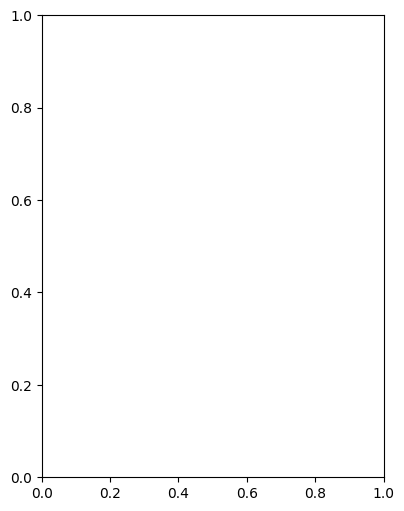

In [17]:
# Boxplot untuk deteksi outlier
plt.figure(figsize=(15, 6))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f"Boxplot {col}")
plt.tight_layout()
plt.show()

In [ ]:
numerical_cols = ["Tenure Months", "Monthly Charges", "Total Charges"]

plt.figure(figsize=(10,6))
for col in numerical_cols:
    sns.kdeplot(df[col].dropna(), label=col, fill=True, alpha=0.4)
plt.title("KDE Plot of Numeric Variables")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()

insight:
- Tenure Months condong ke pelanggan baru, artinya banyak pelanggan berhenti sebelum 1 tahun
- Total Charges memiliki outlier yang sangat tinggi
- Distribusi menunjukkan pelanggan baru + biaya tinggi = rawan churn.
- KDE Plot: Pola distribusi lebih jelas; Monthly Charges menunjukkan beberapa puncak (multimodal) menandakan adanya segmen harga berbeda

## 3. Visualisasi Data Bivariat

- Apakah ada hubungan antara Tenure dengan Monthly Charges?

- Bagaimana korelasi Total Charges dengan Tenure Months?

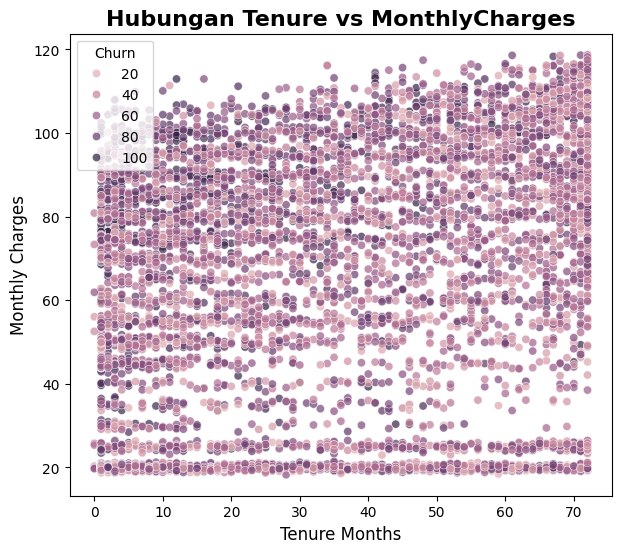

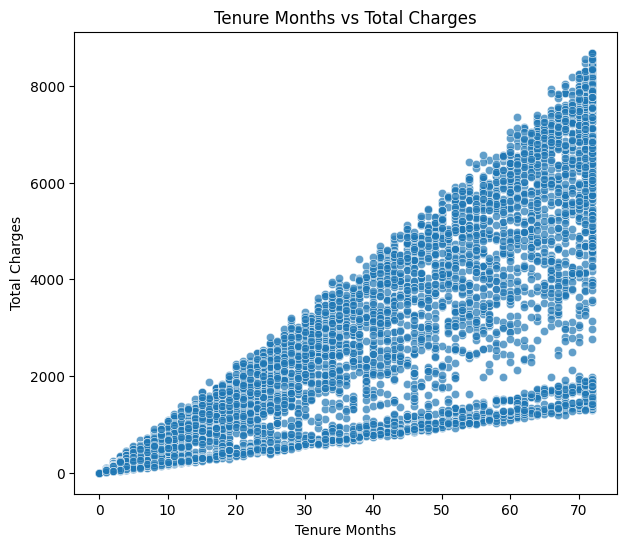

TypeError: Series.corr() missing 1 required positional argument: 'other'

<Figure size 600x400 with 0 Axes>

In [18]:
plt.figure(figsize=(7, 6))
scatter = sns.scatterplot(data=df, x="Tenure Months", y="Monthly Charges", hue="Churn Score", alpha=0.7)
plt.title("Hubungan Tenure vs MonthlyCharges", fontweight="bold", fontsize=16)
plt.xlabel("Tenure Months", fontsize=12)
plt.ylabel("Monthly Charges", fontsize=12)

plt.legend(title='Churn')
plt.show()

plt.figure(figsize=(7,6))
sns.scatterplot(data=df, x="Tenure Months", y="Total Charges", alpha=0.7)
plt.title("Tenure Months vs Total Charges")
plt.xlabel("Tenure Months")
plt.ylabel("Total Charges")
plt.show()


# Heatmap korelasi numerik
plt.figure(figsize=(6, 4))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap="Blues")
plt.title("Korelasi antar variabel numerik")
plt.show()

insight:
- Scatter plot tenure vs MonthlyCharges → pelanggan baru terlihat tersebar dengan biaya bervariasi.

- Korelasi tinggi antara tenure dan TotalCharges (logis: makin lama, makin besar total biaya).

- Churn sering muncul pada pelanggan dengan tenure rendah + MonthlyCharges tinggi.

## 4. Visualisasi Data Kategorikal

- Apakah churn berbeda menurut Contract (bulanan vs tahunan)?

- Apakah metode pembayaran (PaymentMethod) memengaruhi churn?

- Apakah pelanggan dengan addon services lebih loyal?

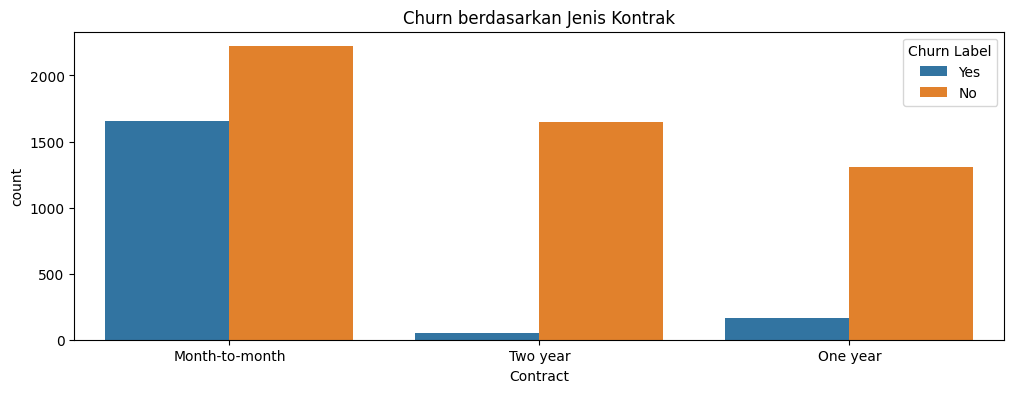

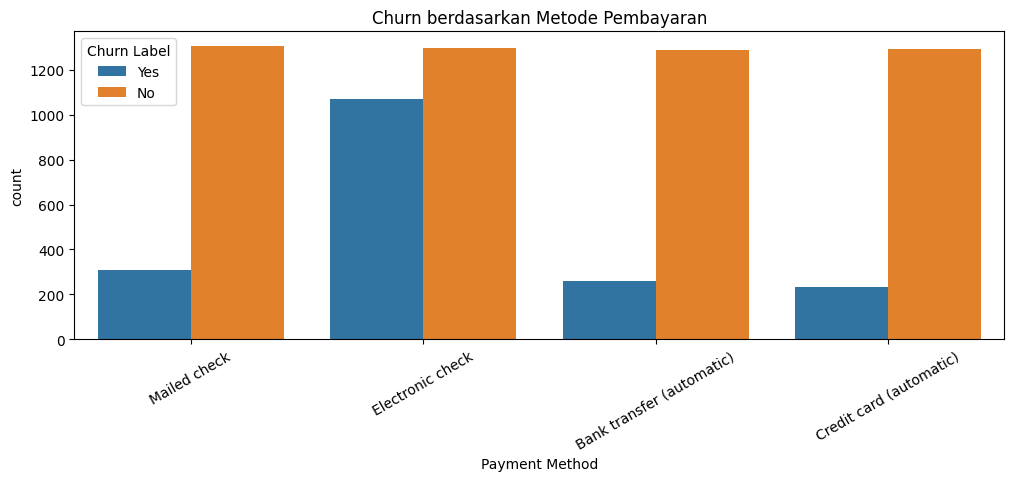

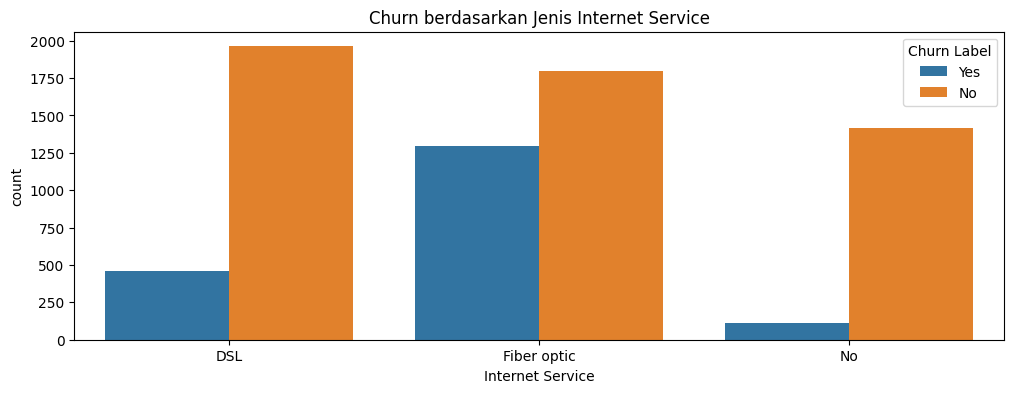

In [19]:
plt.figure(figsize=(12, 4))
sns.countplot(data=df, x="Contract", hue="Churn Label")
plt.title("Churn berdasarkan Jenis Kontrak")
plt.show()

plt.figure(figsize=(12, 4))
sns.countplot(data=df, x="Payment Method", hue="Churn Label")
plt.xticks(rotation=30)
plt.title("Churn berdasarkan Metode Pembayaran")
plt.show()

plt.figure(figsize=(12, 4))
sns.countplot(data=df, x="Internet Service", hue="Churn Label")
plt.title("Churn berdasarkan Jenis Internet Service")
plt.show()

In [ ]:
contract_churn = pd.crosstab(df["Contract"], df["Churn Label"], normalize="index")

contract_churn.plot(kind="bar", stacked=True, figsize=(7,5), colormap="coolwarm")
plt.title("Contract Type vs Churn (Proportion)")
plt.ylabel("Proportion")
plt.xlabel("Contract Type")
plt.xticks(rotation=30)
plt.legend(title="Churn")
plt.show()


insight:
- Pelanggan dengan Month-to-Month punya churn rate paling tinggi.

- Metode pembayaran Electronic Check lebih berisiko churn dibanding Auto Payment.

- Pelanggan dengan lebih banyak layanan tambahan (Phone, Streaming, Internet) cenderung lebih setia.

- Contract vs Churn: pelanggan dengan kontrak panjang cenderung lebih sedikit churn.

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18,7))

# 1) Distribusi Churn
sns.countplot(data=df, x="Churn Label", palette="Set2", ax=axes[0])
axes[0].set_title("Distribution of Customer Churn")
axes[0].set_xlabel("Churn")
axes[0].set_ylabel("Count")

# 2) Contract vs Churn (proporsi stacked bar)
contract_churn = pd.crosstab(df["Contract"], df["Churn Label"], normalize="index")
contract_churn.plot(kind="bar", stacked=True, colormap="coolwarm", ax=axes[1])
axes[1].set_title("Contract Type vs Churn (Proportion)")
axes[1].set_ylabel("Proportion")
axes[1].set_xlabel("Contract Type")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)


# 3) Scatter Monthly Charges vs Total Charges dengan hue=Churn
sns.scatterplot(
    data=df, x="Monthly Charges", y="Total Charges",
    hue="Churn Label", alpha=0.6, palette="Set1", ax=axes[2]
)
axes[2].set_title("Monthly vs Total Charges (Colored by Churn)")
axes[2].set_xlabel("Monthly Charges")
axes[2].set_ylabel("Total Charges")

plt.tight_layout()
plt.show()

Storyline: Customer Churn Analysis
1. Bagaimana kondisi churn secara umum?

Chart pertama (Distribution of Customer Churn) menunjukkan bahwa mayoritas pelanggan tidak churn, tetapi proporsi churn cukup besar (sekitar 25–30%). Ini artinya churn adalah isu serius karena jumlah pelanggan yang hilang cukup signifikan.

- Insight: Perusahaan harus fokus pada segmen pelanggan yang berisiko churn agar tidak kehilangan revenue lebih besar.

2. Apakah tipe kontrak berpengaruh pada churn?

Chart kedua (Contract Type vs Churn Proportion) memperlihatkan pola yang sangat jelas:

Month-to-month contract punya tingkat churn tertinggi.

One year contract churn lebih rendah.

Two year contract churn paling rendah (pelanggan lebih loyal).

- Insight: Kontrak jangka panjang mengurangi risiko churn karena pelanggan “terikat” lebih lama. Strategi yang efektif adalah mendorong pelanggan month-to-month untuk beralih ke kontrak tahunan.

3. Apakah biaya memengaruhi churn?

Chart ketiga (Monthly Charges vs Total Charges, hue=Churn) memberi gambaran menarik:

Pelanggan churn umumnya berada di biaya bulanan tinggi tetapi tenure rendah → terlihat sebagai titik-titik churn di bagian kiri atas scatter plot.

Pelanggan non-churn lebih tersebar, dengan biaya bulanan bervariasi namun tenure panjang → terlihat di kanan bawah (Total Charges tinggi, Monthly Charges lebih bervariasi).

- Insight: High monthly charges + short tenure = high churn risk.
Artinya, pelanggan baru dengan biaya tinggi cepat merasa “mahal” lalu churn.

In [16]:
from google.colab import files
df.to_csv('sample13.csv', index=False)
files.download('sample13.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>